In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [3]:
meta = pd.read_excel("articoli.xlsx", encoding="utf8", error_bad_lines=False)
meta = meta.replace(np.nan, '', regex=True)

In [4]:
meta.head()

ID  \
0  655dde2aeba917a7ca29388dbc3d77cb   
1  ec86361327808e44cb6ede901b8ae718   
2  d0d9e4d9fd83756aea7505900b50b8da   
3  6b5272a2204d6dbfb30bddb91642a620   
4  7e006110e942ff2f17f7ef5ba8191fa4   

                                                                      Titolo  \
0          A Colorado Neighborhood Runs on a Self-Reliant, Clean Energy Grid   
1                   A New Hole Is Forming in the Ozone Layer Over the Arctic   
2                                Here's NASA's Plan for a Lunar "Base Camp"   
3  Is Residential Solar Power Worth It? This Free Online Tool Will Tell You.   
4               NASA Funds Giant Radio Telescope Concept on Far Side of Moon   

                                                                  Url Data  \
0  https://futurism.com/colorado-neighborhood-built-clean-energy-grid        
1                        https://futurism.com/hole-ozone-layer-arctic        
2                    https://futurism.com/nasa-artemis-base-camp-moon        
3            https://futurism.com/is-residential-solar-power-worth-it        
4             https://futurism.com/nasa-radio-telescope-far-side-moon        

                                                                                                                                                                                                                                                                                                      Abstract  \
0             Local Grid In Basalt , Colorado , a new housing development is testing out a new way to distribute electricity . Instead of relying on a plant somewhere to dole out electricity to their homes , residents of the Basalt Vista development are relying on an experimental virtual power plant.    
1                                           Over the last month , a new hole in the ozone layer has started to form over the Arctic . But this time around , extreme weather and atmospheric conditions have led to a far greater depletion than normal , according to a European Space Agency press release .   
2  NASA has outlined its plans for a lunar station called the Artemis Base Camp in a new 13-page report titled “NASA’ s Plan for Sustained Lunar Exploration and Development” submitted to the National Space Council last week . After 20 years of continuously living in low-Earth orbit , we’re now read...   
3  Everybody knows solar power is great in theory . Over the last 10 years the cost of installing solar panels has dropped roughly 70 percent thanks to lower equipment costs , lower installation costs , and various government tax incentives , including the Federal Solar Tax Credit . After that , a ...   
4  NASA is funding research for a giant radio telescope in a crater on the far side of the Moon . According to a description by research lead Saptarshi Bandyopadhyay , robotics technologist at NASA ’ s Jet Propulsion Laboratory in California , the idea is to capture the “ tremendous advantages comp...   

      Fonte Stato          Tecnologia 1     Tecnologia 2 Tecnologia 3  ...  \
0  Futurism  DONE    Renewable Energies  Neural Networks               ...   
1  Futurism  DONE    Renewable Energies                                ...   
2  Futurism  DONE  Low-Earth Satellites                                ...   
3  Futurism  DONE    Renewable Energies                                ...   
4  Futurism  DONE  Low-Earth Satellites                                ...   

     Application 2 Application 3          Trend 1      Trend 2  \
0  Smart Contracts                  Low Emissions  Smart Grids   
1                                   Low Emissions                
2                                   Space Economy                
3                                 Decarbonization                
4                                                                

           Trend 3 Unnamed: 22 Trend Tecnologia Vertical Settore  
0  Electrification                                                
1          

In [5]:
article_id = meta['ID']
len(article_id)

104

In [6]:
meta['Tecnologia 1'][0]

'Renewable Energies'

In [7]:
tech1 = []
for i in meta['Tecnologia 1']:
    tech1.append(i)

tech2 = []
for i in meta['Tecnologia 2']:
    tech2.append(i)
    
tech3 = []
for i in meta['Tecnologia 3']:
    tech3.append(i)

In [8]:
Tech = []
for i in range(len(article_id)):
    l = []
    if len(tech1[i]): l.append(tech1[i])
    if len(tech2[i]): l.append(tech2[i])
    if len(tech3[i]): l.append(tech3[i])
        
    #Tech.append(list(l))
    Tech.append(', '.join(map(str, list(l)))) 
    
Tech[0]

'Renewable Energies, Neural Networks'

In [9]:
len(article_id)

104

In [10]:
# Create Tech Dataframe
tech = pd.DataFrame({'ID': article_id, 'Tech': Tech})
tech.head()

ID                                 Tech
0  655dde2aeba917a7ca29388dbc3d77cb  Renewable Energies, Neural Networks
1  ec86361327808e44cb6ede901b8ae718                   Renewable Energies
2  d0d9e4d9fd83756aea7505900b50b8da                 Low-Earth Satellites
3  6b5272a2204d6dbfb30bddb91642a620                   Renewable Energies
4  7e006110e942ff2f17f7ef5ba8191fa4                 Low-Earth Satellites

In [11]:
articoli = meta[['ID','Titolo','Abstract']]
articoli = pd.merge(articoli, tech, on = 'ID')

In [12]:
articoli.head()

ID  \
0  655dde2aeba917a7ca29388dbc3d77cb   
1  ec86361327808e44cb6ede901b8ae718   
2  d0d9e4d9fd83756aea7505900b50b8da   
3  6b5272a2204d6dbfb30bddb91642a620   
4  7e006110e942ff2f17f7ef5ba8191fa4   

                                                                      Titolo  \
0          A Colorado Neighborhood Runs on a Self-Reliant, Clean Energy Grid   
1                   A New Hole Is Forming in the Ozone Layer Over the Arctic   
2                                Here's NASA's Plan for a Lunar "Base Camp"   
3  Is Residential Solar Power Worth It? This Free Online Tool Will Tell You.   
4               NASA Funds Giant Radio Telescope Concept on Far Side of Moon   

                                                                                                                                                                                                                                                                                                      Abstract  \
0             Local Grid In Basalt , Colorado , a new housing development is testing out a new way to distribute electricity . Instead of relying on a plant somewhere to dole out electricity to their homes , residents of the Basalt Vista development are relying on an experimental virtual power plant.    
1                                           Over the last month , a new hole in the ozone layer has started to form over the Arctic . But this time around , extreme weather and atmospheric conditions have led to a far greater depletion than normal , according to a European Space Agency press release .   
2  NASA has outlined its plans for a lunar station called the Artemis Base Camp in a new 13-page report titled “NASA’ s Plan for Sustained Lunar Exploration and Development” submitted to the National Space Council last week . After 20 years of continuously living in low-Earth orbit , we’re now read...   
3  Everybody knows solar power is great in theory . Over the last 10 years the cost of installing solar panels has dropped roughly 70 percent thanks to lower equipment costs , lower installation costs , and various government tax incentives , including the Federal Solar Tax Credit . After that , a ...   
4  NASA is funding research for a giant radio telescope in a crater on the far side of the Moon . According to a description by research lead Saptarshi Bandyopadhyay , robotics technologist at NASA ’ s Jet Propulsion Laboratory in California , the idea is to capture the “ tremendous advantages comp...   

                                  Tech  
0  Renewable Energies, Neural Networks  
1                   Renewable Energies  
2                 Low-Earth Satellites  
3                   Renewable Energies  
4                 Low-Earth Satellites

In [13]:
# remove samples with no tags
articoli['Tech'] = articoli['Tech'].apply(lambda y: '' if len(y)==0 else y)
articoli = articoli[~(articoli['Tech'].str.len() == 0)]
articoli = articoli[~(articoli['Abstract'].str.len() == 0)]

In [14]:
articoli.head()

ID  \
0  655dde2aeba917a7ca29388dbc3d77cb   
1  ec86361327808e44cb6ede901b8ae718   
2  d0d9e4d9fd83756aea7505900b50b8da   
3  6b5272a2204d6dbfb30bddb91642a620   
4  7e006110e942ff2f17f7ef5ba8191fa4   

                                                                      Titolo  \
0          A Colorado Neighborhood Runs on a Self-Reliant, Clean Energy Grid   
1                   A New Hole Is Forming in the Ozone Layer Over the Arctic   
2                                Here's NASA's Plan for a Lunar "Base Camp"   
3  Is Residential Solar Power Worth It? This Free Online Tool Will Tell You.   
4               NASA Funds Giant Radio Telescope Concept on Far Side of Moon   

                                                                                                                                                                                                                                                                                                      Abstract  \
0             Local Grid In Basalt , Colorado , a new housing development is testing out a new way to distribute electricity . Instead of relying on a plant somewhere to dole out electricity to their homes , residents of the Basalt Vista development are relying on an experimental virtual power plant.    
1                                           Over the last month , a new hole in the ozone layer has started to form over the Arctic . But this time around , extreme weather and atmospheric conditions have led to a far greater depletion than normal , according to a European Space Agency press release .   
2  NASA has outlined its plans for a lunar station called the Artemis Base Camp in a new 13-page report titled “NASA’ s Plan for Sustained Lunar Exploration and Development” submitted to the National Space Council last week . After 20 years of continuously living in low-Earth orbit , we’re now read...   
3  Everybody knows solar power is great in theory . Over the last 10 years the cost of installing solar panels has dropped roughly 70 percent thanks to lower equipment costs , lower installation costs , and various government tax incentives , including the Federal Solar Tax Credit . After that , a ...   
4  NASA is funding research for a giant radio telescope in a crater on the far side of the Moon . According to a description by research lead Saptarshi Bandyopadhyay , robotics technologist at NASA ’ s Jet Propulsion Laboratory in California , the idea is to capture the “ tremendous advantages comp...   

                                  Tech  
0  Renewable Energies, Neural Networks  
1                   Renewable Energies  
2                 Low-Earth Satellites  
3                   Renewable Energies  
4                 Low-Earth Satellites

In [15]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text)
    text = re.sub(r'[?|!|\'|"|#]',r'',text)
    text = re.sub(r'[.|,|)|(|\|/]',r' ',text)
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    
    text = text.replace("\n"," ")
    
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [16]:
articoli['Titolo'] = articoli['Titolo'].apply(lambda x: clean_text(x))
articoli['Abstract'] = articoli['Abstract'].apply(lambda x: clean_text(x))
articoli.head()

ID  \
0  655dde2aeba917a7ca29388dbc3d77cb   
1  ec86361327808e44cb6ede901b8ae718   
2  d0d9e4d9fd83756aea7505900b50b8da   
3  6b5272a2204d6dbfb30bddb91642a620   
4  7e006110e942ff2f17f7ef5ba8191fa4   

                                                                    Titolo  \
0         a colorado neighborhood runs on a self reliant clean energy grid   
1                 a new hole is forming in the ozone layer over the arctic   
2                                   heres nasas plan for a lunar base camp   
3  is residential solar power worth it this free online tool will tell you   
4             nasa funds giant radio telescope concept on far side of moon   

                                                                                                                                                                                                                                                                                                      Abstract  \
0                       local grid in basalt colorado a new housing development is testing out a new way to distribute electricity instead of relying on a plant somewhere to dole out electricity to their homes residents of the basalt vista development are relying on an experimental virtual power plant   
1                                                     over the last month a new hole in the ozone layer has started to form over the arctic but this time around extreme weather and atmospheric conditions have led to a far greater depletion than normal according to a european space agency press release   
2  nasa has outlined its plans for a lunar station called the artemis base camp in a new page report titled nasa s plan for sustained lunar exploration and development submitted to the national space council last week after years of continuously living in low earth orbit we re now ready for the nex...   
3  everybody knows solar power is great in theory over the last years the cost of installing solar panels has dropped roughly percent thanks to lower equipment costs lower installation costs and various government tax incentives including the federal solar tax credit after that a solar energy exper...   
4  nasa is funding research for a giant radio telescope in a crater on the far side of the moon according to a description by research lead saptarshi bandyopadhyay robotics technologist at nasa s jet propulsion laboratory in california the idea is to capture the tremendous advantages compared to ea...   

                                  Tech  
0  Renewable Energies, Neural Networks  
1                   Renewable Energies  
2                 Low-Earth Satellites  
3                   Renewable Energies  
4                 Low-Earth Satellites

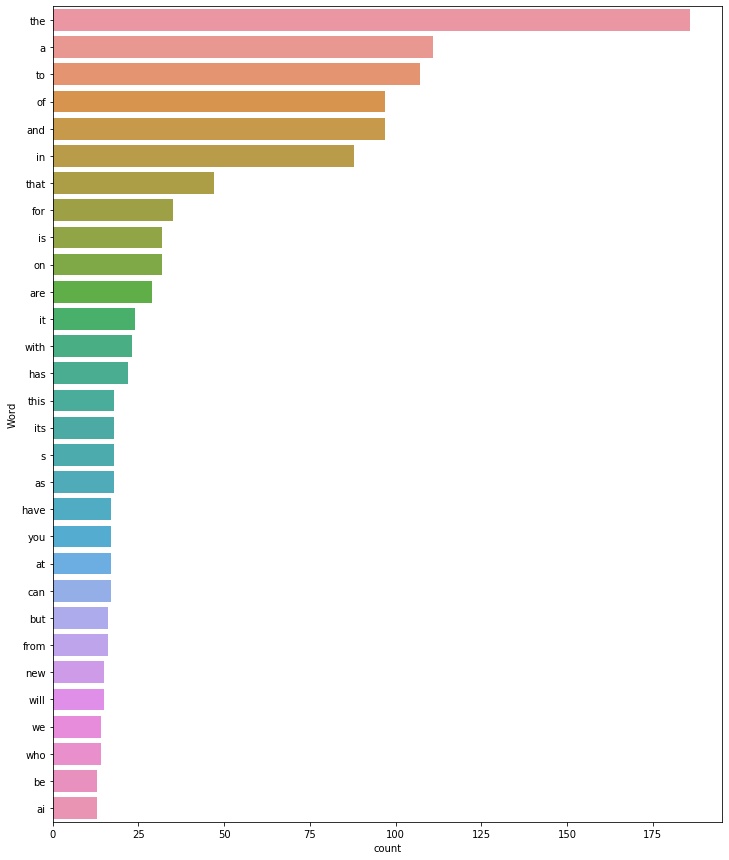

In [17]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(articoli['Abstract'], 30)

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edoardo.esposito\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

articoli['Abstract'] = articoli['Abstract'].apply(lambda x: remove_stopwords(x))
articoli['Titolo'] = articoli['Titolo'].apply(lambda x: remove_stopwords(x))

In [20]:
articoli['Testo'] = articoli['Titolo'] + articoli['Abstract']

In [21]:
articoli.head()

ID  \
0  655dde2aeba917a7ca29388dbc3d77cb   
1  ec86361327808e44cb6ede901b8ae718   
2  d0d9e4d9fd83756aea7505900b50b8da   
3  6b5272a2204d6dbfb30bddb91642a620   
4  7e006110e942ff2f17f7ef5ba8191fa4   

                                                      Titolo  \
0  colorado neighborhood runs self reliant clean energy grid   
1                        new hole forming ozone layer arctic   
2                           heres nasas plan lunar base camp   
3        residential solar power worth free online tool tell   
4     nasa funds giant radio telescope concept far side moon   

                                                                                                                                                                                                                                                                                                      Abstract  \
0                                                                                 local grid basalt colorado new housing development testing new way distribute electricity instead relying plant somewhere dole electricity homes residents basalt vista development relying experimental virtual power plant   
1                                                                                                                        last month new hole ozone layer started form arctic time around extreme weather atmospheric conditions led far greater depletion normal according european space agency press release   
2  nasa outlined plans lunar station called artemis base camp new page report titled nasa plan sustained lunar exploration development submitted national space council last week years continuously living low earth orbit ready next great challenge space exploration development sustained presence aro...   
3  everybody knows solar power great theory last years cost installing solar panels dropped roughly percent thanks lower equipment costs lower installation costs various government tax incentives including federal solar tax credit solar energy expert contact via phone go assessment answer questions...   
4  nasa funding research giant radio telescope crater far side moon according description research lead saptarshi bandyopadhyay robotics technologist nasa jet propulsion laboratory california idea capture tremendous advantages compared earth based earth orbiting telescopes far side moon researchers...   

                                  Tech  \
0  Renewable Energies, Neural Networks   
1                   Renewable Energies   
2                 Low-Earth Satellites   
3                   Renewable Energies   
4                 Low-Earth Satellites   

                                                                                                                                                                                                                                                                                                         Testo  
0                        colorado neighborhood runs self reliant clean energy gridlocal grid basalt colorado new housing development testing new way distribute electricity instead relying plant somewhere dole electricity homes residents basalt vista development relying experimental virtual power plant  
1                                                                                     new hole forming ozone layer arcticlast month new hole ozone layer started form arctic time around extreme weather atmospheric conditions led far greater depletion normal according european space agency press release  
2  heres nasas plan lunar base campnasa outlined plans lunar station called artemis base camp new page report titled nasa plan sustained lunar exploration development submitted national space council last week years continuously living low earth orbit ready next great challenge space exploration de...  
3  residential solar power worth free online tool telleverybody knows solar power great theory last yea

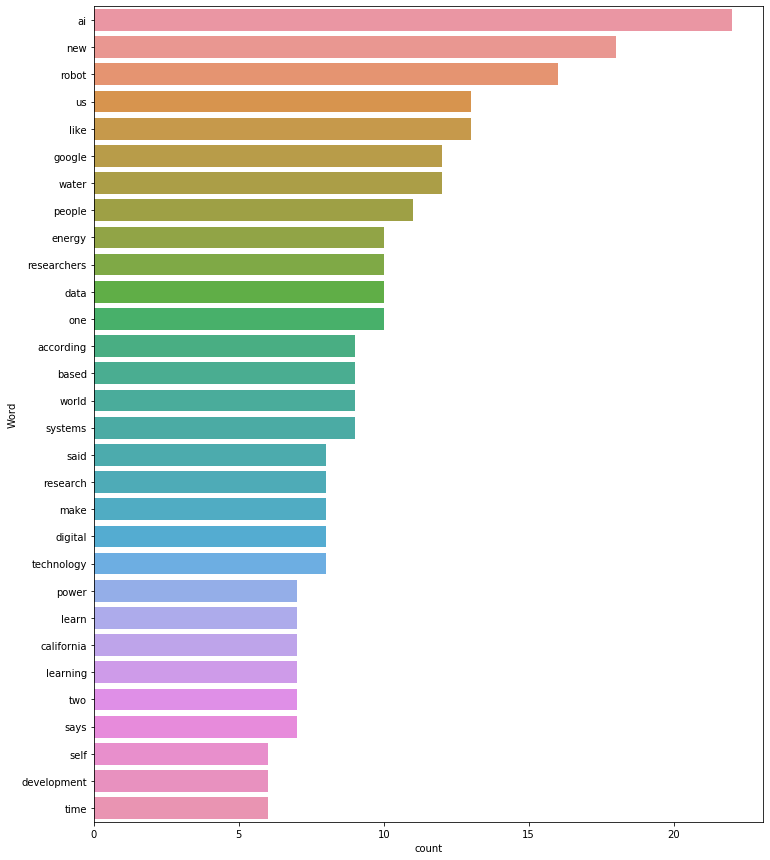

In [22]:
freq_words(articoli['Testo'], 30)

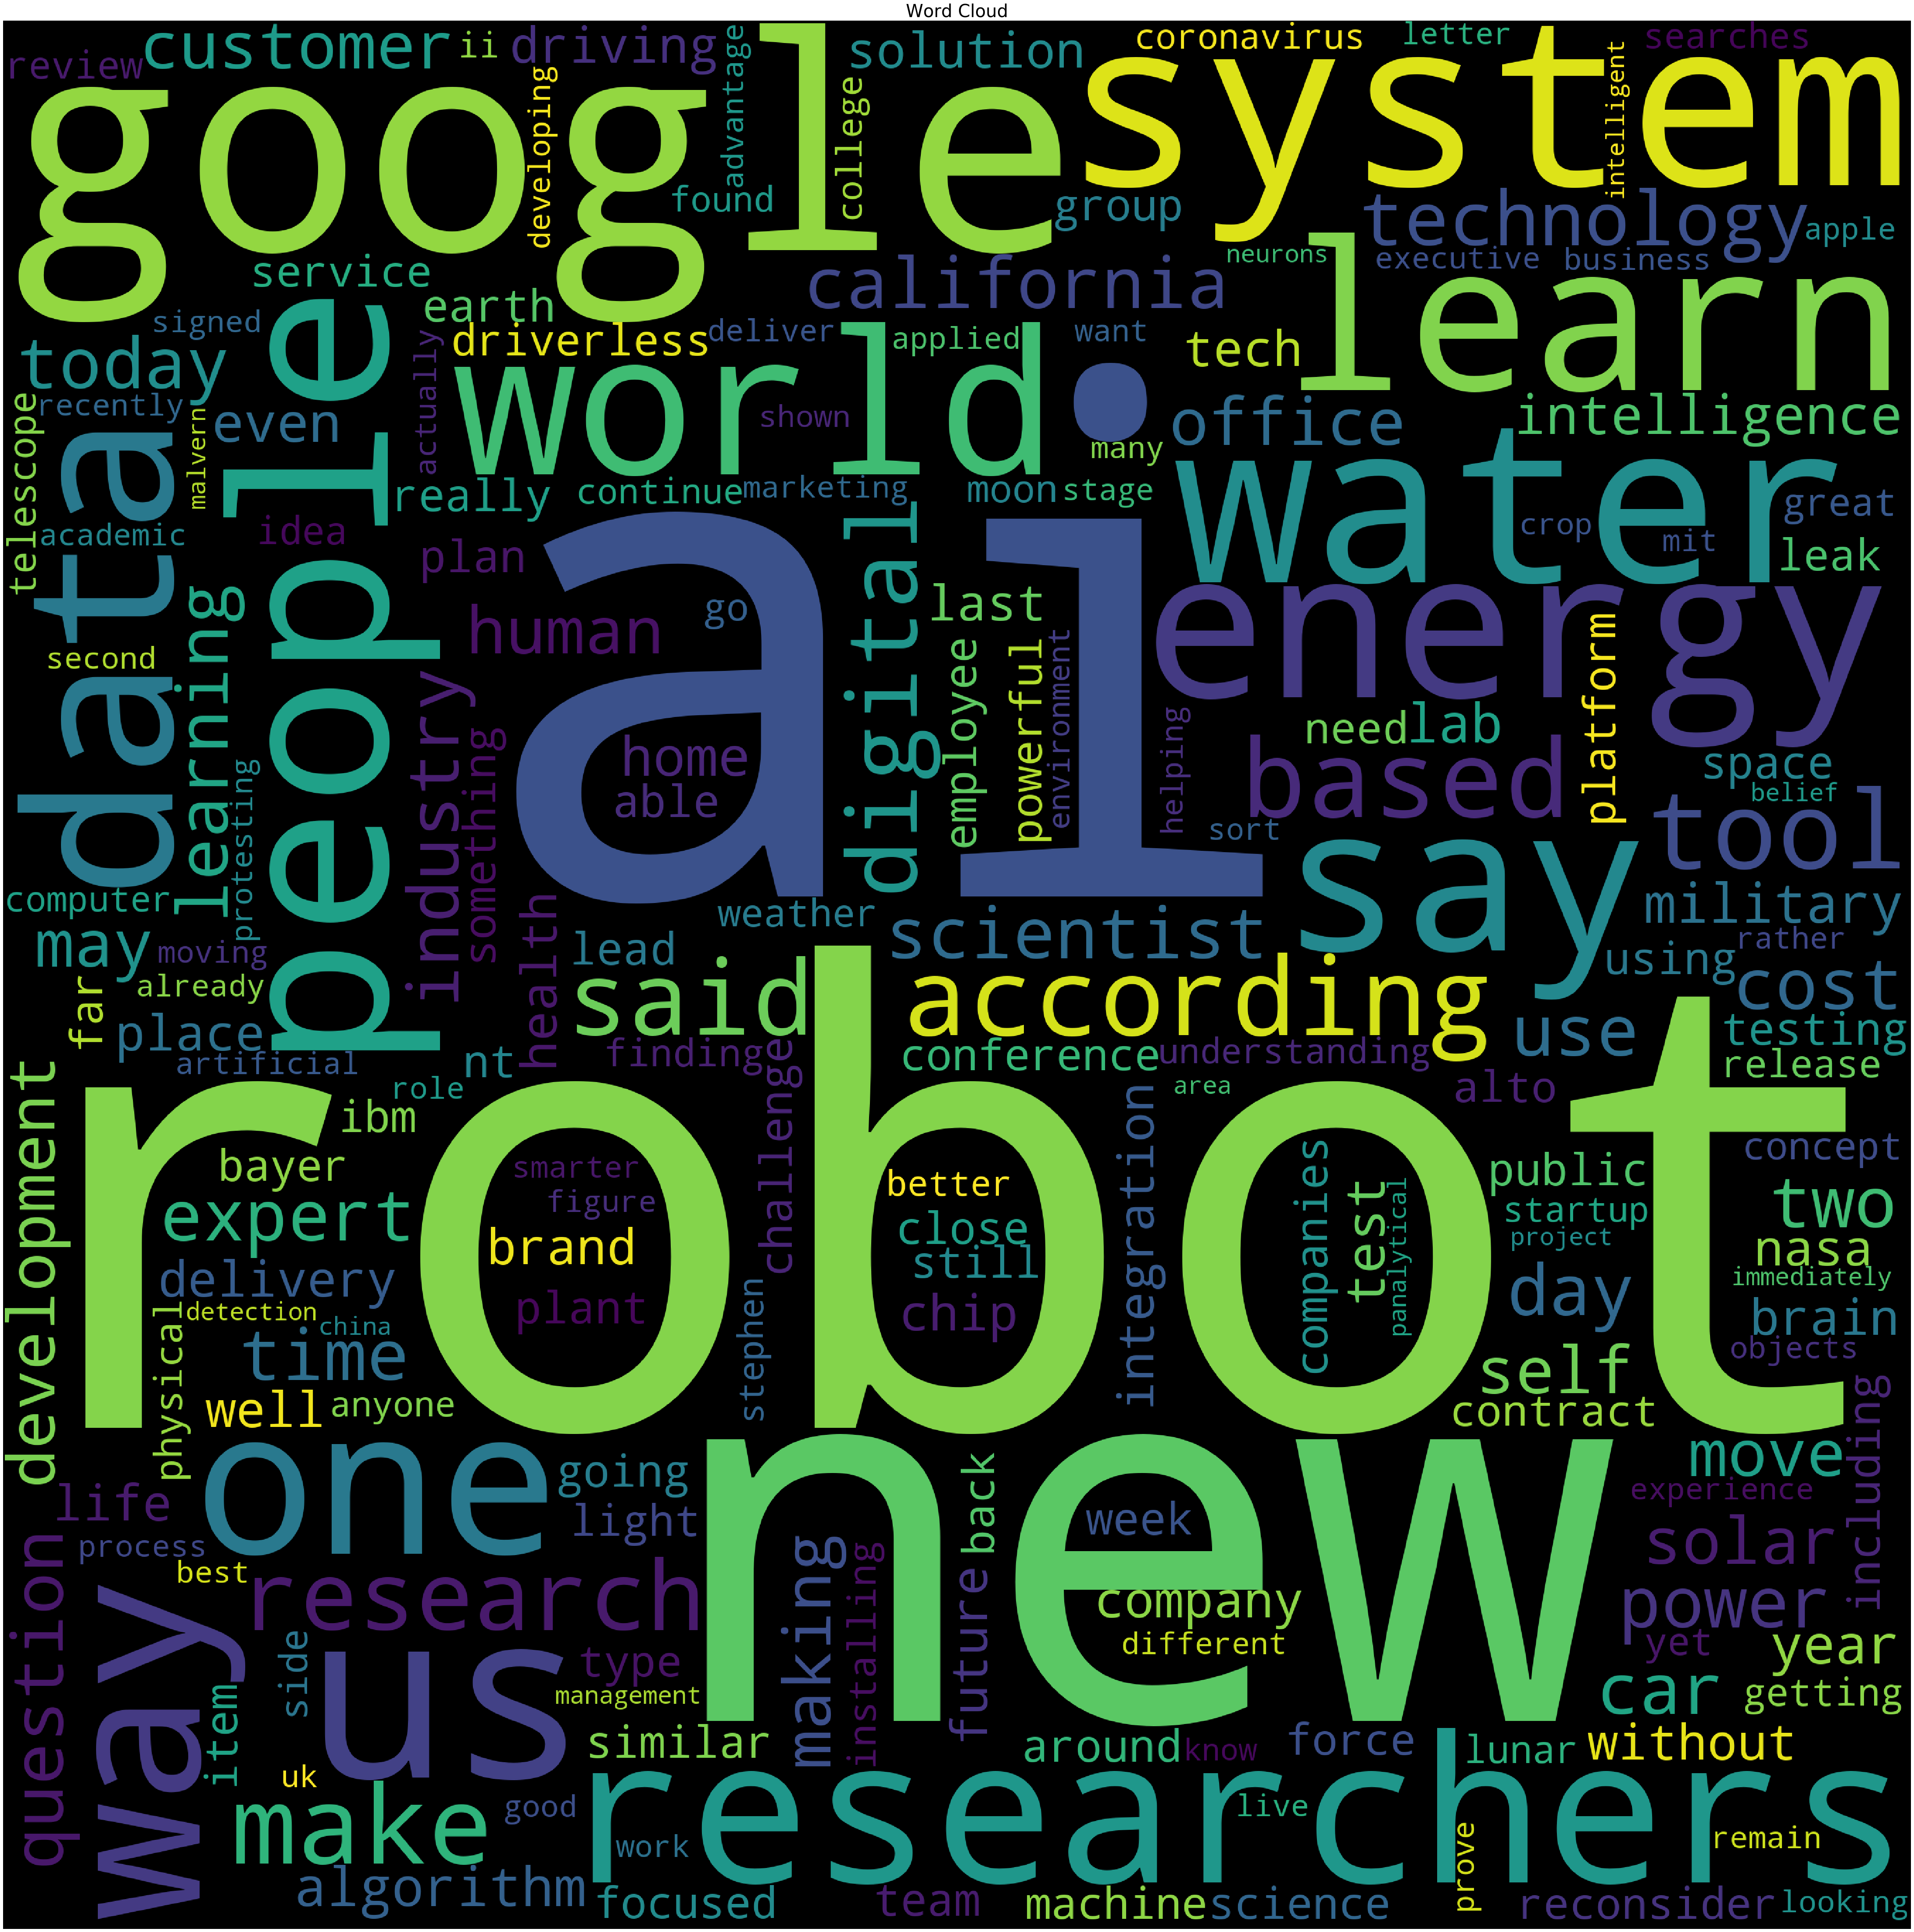

In [23]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(80,80))
text = articoli.Testo.values

cloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=3000,
                          height=3000
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Word Cloud",fontsize=40)
plt.imshow(cloud)

In [ ]:
#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer("english")

In [24]:
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [ ]:
# SERVE?
#articoli['Testo'] = articoli['Testo'].apply(stemming)

In [25]:
# convert text to features
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(articoli['Tech'])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [26]:
# transform target variable
y = multilabel_binarizer.transform(articoli['Tech'])

In [41]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [42]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(articoli['Testo'], y, test_size=0.2, random_state=9)

In [43]:
xtrain.head()

37    may apple ii ai driven robot armsrobots factories today powerful precise dumb toast robots increasingly able learn new tasks whether trial error via expert demonstration says stephen mckinley postdoc uc berkeley involved developing robot without low cost platform apple ii type device experimenta...
5     physicists crashing matter antimatter hunt new bosonyear experimentation japan superkekb particle accelerator physicists say getting close finding theorized yet undiscovered elementary particle findings published journal physical review letters vastly tightened scientists understanding boson wou...
79    orbis intelligent systems signs distribution agreement aquip systemsorbis intelligent systems signed multi year distribution agreement aquip systems australia based provider measurement data collection systems oil gas mining marine hvac water chemical industries aquip managing director jodie dra...
51                                                     blockchain platform lets co

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

def CLF_prediction(xtrain, xval, ytrain):

    
    # create TF-IDF features
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
    xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
    xval_tfidf = tfidf_vectorizer.transform(xval)
    
    # fit model on train data
    clf.fit(xtrain_tfidf, ytrain)
    
    # make predictions for validation set
    y_pred = clf.predict(xval_tfidf)
    
    return y_pred

In [53]:
y_pred = CLF_prediction(xtrain, xval, ytrain)
y_pred[3]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [54]:
#convert the predicted arrays into movie genre tags
multilabel_binarizer.inverse_transform(y_pred)[3]

(' ', ',', 'B', 'a', 'e', 'g', 'i', 'l', 'o', 'r', 's', 't', 'u', 'w')

In [55]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [56]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [57]:
for i in range(5): 
    k = xval.sample(1).index[0]
    print("Article: ", articoli['Abstract'][k], \
        "\nPredicted tech: ", infer_tags(xval[k])),
    print("Actual tech: ",articoli['Tech'][k], "\n")

Article:  turns frantic google searches people make feel sick leveraged valuable public health tool team scientists harvard university college london found spikes google searches symptoms covid coincide neatly outbreak hotspots according opinion piece new york times data scientist seth stephens davidowitz system could help public health experts better track predict manage coronavirus pandemic 
Predicted tech:  [(' ', 'a', 'e', 'g', 'i', 'l', 'o', 's', 't')]
Actual tech:  Big Data 

Article:  makes basil good similar technology already applied commercial farms says naveen singla leads data science team focused crops bayer german multinational acquired monsanto last year open environments still question close gap harper added future group consider genetic make plants something bayer feeds algorithms look release technology anyone 
Predicted tech:  [(' ', ',', 'B', 'a', 'e', 'g', 'i', 'l', 'o', 'r', 's', 't', 'u', 'w')]
Actual tech:  AI Chips, Big Data 

Article:  company executive fancie